In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../scripts/')
import utils_covid as f

import plotly.express as px
from plotly import graph_objs as go


In [23]:
%load_ext autoreload
%autoreload 2

%aimport utils_covid

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
pd.set_option('display.max_columns', 500)

__Information__

Dans ce notebook sont créés divers pickle à l'usage de l'onglet de contamination:
- `region_info_by_id.p` : à partir d'un id de nouvelle région, retrouver son nom, lattitude, longitude
- `radiobox_region.p` : crée le contenu des radioBox région. Label=Nom, Value=Code
- `df_contamination_fr.p`: dataset avec informations de contamination en France : par date et par région

# Loading

__df_h__

In [27]:
path = f.OPENDATA_PATH + 'donnees-hospitalieres-covid-19-dep-france.csv'
df_h = pd.read_csv(path, sep=';')
df_h.tail()

,Code du Département,Date,Nb actuellement hospitalisés,Nb actuellement en soins intensifs,Total retour à domicile,Total Décès,Code région,Code ISO 3166 de la zone,Nom région,Nom Département,Sexe,Geo Point
2217,42,2020-03-28,118,13,19,9,84,FRA,Auvergne-Rhône-Alpes,Loire,Femme,"45.727718684,4.16117137934"
2218,44,2020-03-28,84,29,24,12,52,FRA,Pays de la Loire,Loire-Atlantique,Homme,"47.3612553393,-1.6750424562"
2219,48,2020-03-28,4,2,3,0,76,FRA,Occitanie,Lozère,Homme,"44.5155815066,3.49993932838"
2220,64,2020-03-28,30,7,16,2,75,FRA,Nouvelle-Aquitaine,Pyrénées-Atlantiques,Homme,"43.2555265161,-0.759231599387"
2221,81,2020-03-28,14,7,5,1,76,FRA,Occitanie,Tarn,Homme,"43.7873656836,2.1627880067"


In [28]:
# Création de l'information par région
tmp_region = df_h[['Code région', 'Geo Point', 'Nom région']].drop_duplicates()
tmp_region['lat'] = tmp_region['Geo Point'].apply(lambda x: x.split(',')[0]).apply(float)
tmp_region['lon'] = tmp_region['Geo Point'].apply(lambda x: x.split(',')[1]).apply(float)
tmp_region = tmp_region.rename(columns={'Code région':'code_region', 'Nom région':'region'}).drop(['Geo Point'], axis=1)
region_info = tmp_region.drop_duplicates('code_region').set_index('code_region').to_dict(orient='index')
f.save_pickle(region_info, 'region_info_by_id.p')

# Example
code_region =11 # Ile de France
region_info[code_region]

{'region': 'Île-de-France', 'lat': 48.6281210472, 'lon': 2.93531969909}

In [29]:
# Création de radiobox avec les régions
if 11 in tmp_region.code_region.unique():
    tmp_region.loc[tmp_region.code_region==11, 'region']='Ile-de-France'
options_region = tmp_region.set_index('code_region')['region'].sort_values().to_dict()
options_region = [{'label': value, 'value': key} for key, value in options_region.items() if int(key) > 10]
f.save_pickle(options_region, 'radiobox_region.p')
options_region

[{'label': 'Auvergne-Rhône-Alpes', 'value': 84},
 {'label': 'Bourgogne-Franche-Comté', 'value': 27},
 {'label': 'Bretagne', 'value': 53},
 {'label': 'Centre-Val de Loire', 'value': 24},
 {'label': 'Corse', 'value': 94},
 {'label': 'Grand Est', 'value': 44},
 {'label': 'Hauts-de-France', 'value': 32},
 {'label': 'Ile-de-France', 'value': 11},
 {'label': 'Normandie', 'value': 28},
 {'label': 'Nouvelle-Aquitaine', 'value': 75},
 {'label': 'Occitanie', 'value': 76},
 {'label': 'Pays de la Loire', 'value': 52},
 {'label': "Provence-Alpes-Côte d'Azur", 'value': 93}]

In [30]:
dep_2_reg = df_h[['Code du Département', 'Code région']].drop_duplicates().set_index('Code du Département')['Code région'].to_dict()
f.save_pickle(dep_2_reg, 'dep_2_reg.p')
print(dep_2_reg)

{'06': 93, '15': 84, '51': 44, '66': 76, '76': 28, '972': 2, '37': 24, '47': 75, '74': 84, '976': 6, '23': 75, '30': 76, '55': 44, '57': 44, '58': 27, '67': 44, '77': 11, '90': 27, '04': 93, '08': 44, '33': 75, '35': 53, '44': 52, '53': 52, '64': 75, '80': 32, '85': 52, '13': 93, '16': 75, '81': 76, '94': 11, '95': 11, '24': 75, '83': 93, '38': 84, '43': 84, '82': 76, '84': 93, '42': 84, '68': 44, '11': 76, '29': 53, '2A': 94, '31': 76, '71': 27, '36': 24, '01': 84, '02': 32, '27': 28, '46': 76, '52': 44, '73': 84, '89': 27, '12': 76, '14': 28, '21': 27, '32': 76, '45': 24, '69': 84, '93': 11, '41': 24, '65': 76, '87': 75, '974': 4, '88': 44, '25': 27, '39': 27, '92': 11, '971': 1, '19': 75, '34': 76, '50': 28, '61': 28, '91': 11, '59': 32, '75': 11, '973': 3, '09': 76, '86': 75, '07': 84, '05': 93, '40': 75, '22': 53, '56': 53, '03': 84, '26': 84, '49': 52, '60': 32, '28': 24, '54': 44, '70': 27, '18': 24, '62': 32, '48': 76, '10': 44, '2B': 94, '78': 11, '72': 52, '63': 84, '17': 75,

In [31]:
df_h = df_h.rename(columns={'Date':'date', 'Code région':'code_region', 'Sexe':'sexe'})

In [32]:
df_h_sex = df_h.groupby(['date', 'code_region', 'sexe']).sum()
df_h_sex.tail()

Nb actuellement hospitalisés  \
date       code_region sexe                                  
2020-03-28 84          Homme                          1091   
           93          Femme                           384   
                       Homme                           519   
           94          Femme                            56   
                       Homme                            52   

                              Nb actuellement en soins intensifs  \
date       code_region sexe                                        
2020-03-28 84          Homme                                 324   
           93          Femme                                  61   
                       Homme                                 146   
           94          Femme                                   6   
                       Homme                                  12   

                              Total retour à domicile  Total Décès  
date       code_region sexe                                         
2020-03-28 84          Homme                      331          106  
           93          Femme                      349           29  
                       Homme                      324           26  
           94          Femme                       35            8  
                       Homme                       36           11

In [33]:
df_h = df_h.groupby(['date', 'code_region']).sum()
df_h.tail()

Nb actuellement hospitalisés  \
date       code_region                                 
2020-03-28 75                                    487   
           76                                    705   
           84                                   1872   
           93                                    903   
           94                                    108   

                        Nb actuellement en soins intensifs  \
date       code_region                                       
2020-03-28 75                                          126   
           76                                          212   
           84                                          421   
           93                                          207   
           94                                           18   

                        Total retour à domicile  Total Décès  
date       code_region                                        
2020-03-28 75                               210           50  
           76                               300           68  
           84                               664          187  
           93                               673           55  
           94                                71           19

__df__

In [48]:
#df = pd.read_csv('/Users/thibaud/Downloads/chiffres-cles.csv')
#df[df['granularite']=='departement'].groupby(['date', 'maille_code']).sum().loc['2020-03-28']

In [36]:
path = f.OPENDATA_PATH + 'evolution-de-la-pandemie-de-covid-19-en-france.csv'
df = pd.read_csv(path, sep=';')
df.tail()

,Code ISO 3166,Type de zone,Code officiel,Nom officiel,Date,Nombre de cas confirmés,Centroide,Source,URL
395,FRA,REG,84,Auvergne-Rhône-Alpes,2020-03-22,1431,"45.5156201847,4.53513455451",Sante publique France,https://www.santepubliquefrance.fr/maladies-et...
396,FRA,REG,24,Centre-Val de Loire,2020-03-22,291,"47.4875464351,1.68135599697",Sante publique France,https://www.santepubliquefrance.fr/maladies-et...
397,GLP,REG,1,Guadeloupe,2020-03-22,58,"16.2122165031,-61.5384397436",Sante publique France,https://www.santepubliquefrance.fr/maladies-et...
398,FRA,REG,76,Occitanie,2020-03-25,1082,"43.7001098498,2.14148603272",Sante publique France,https://www.santepubliquefrance.fr/maladies-et...
399,GUF,REG,3,Guyane,2020-03-25,28,"3.92086784911,-53.2332985406",Sante publique France,https://www.santepubliquefrance.fr/maladies-et...


In [37]:
df['Date'].max()

'2020-03-25'

In [38]:
df = df.rename(columns={'Date':'date', 'Code officiel':'code_region'})
df = df.groupby(['date', 'code_region']).sum()
df.head()

Nombre de cas confirmés
date       code_region                         
2020-03-04 1                                  3
           2                                  0
           3                                  0
           4                                  0
           6                                  0

__df_ser__

In [39]:
path = f.RAW_FR_PATH + 'donnees-hospitalieres-etablissements-covid19-2020-03-24-17h14.csv'
df_ser = pd.read_csv(path, sep=';')
df_ser = df_ser.rename(columns={'jour':'date'})
df_ser.tail()

,dep,date,nb
601,971,2020-03-23,1
602,972,2020-03-23,1
603,973,2020-03-23,0
604,974,2020-03-23,1
605,976,2020-03-23,0


In [14]:
df_ser['code_region'] = df_ser['dep'].apply(lambda x:dep_2_reg[x])
df_ser = df_ser.groupby(['date', 'code_region']).sum()
df_ser.head()

nb
date       code_region    
2020-03-18 1             0
           2             1
           3             0
           4             1
           6             0

# Transformation

In [15]:
df = df.merge(df_ser, left_index=True, right_on=['date', 'code_region'])
df.columns = ['cas_confirme', 'service_covid']
df.head()

cas_confirme  service_covid
date       code_region                             
2020-03-18 1                      33              0
           2                      23              1
           3                      11              0
           4                      14              1
           6                       3              0

In [16]:
df = df.merge(df_h, left_index=True, right_on=['date', 'code_region'])

In [17]:
df.columns = [col.lower().replace(' ', '_').replace('é', 'e').replace('à', 'a').replace('è', 'e') for col in df.columns]
df.head()

cas_confirme  service_covid  \
date       code_region                                
2020-03-18 1                      33              0   
           2                      23              1   
           3                      11              0   
           4                      14              1   
           6                       3              0   

                        nb_actuellement_hospitalises  \
date       code_region                                 
2020-03-18 1                                       0   
           2                                      16   
           3                                       0   
           4                                       2   
           6                                       0   

                        nb_actuellement_en_soins_intensifs  \
date       code_region                                       
2020-03-18 1                                             0   
           2                                             5   
           3                                             0   
           4                                             2   
           6                                             0   

                        total_retour_a_domicile  total_deces  
date       code_region                                        
2020-03-18 1                                  0            0  
           2                                  0            1  
           3                                  0            0  
           4                                  0            0  
           6                                  0            0

In [18]:
f.save_pickle(df, 'df_contamination_fr.p')

# Preparation

__reload_data__

In [19]:
df = f.load_pickle('df_contamination_fr.p')
options_region = f.load_pickle('radiobox_region.p')
dep_2_reg = f.load_pickle('dep_2_reg.p')
region_info = f.load_pickle('region_info_by_id.p')

In [20]:
df.head()

cas_confirme  service_covid  \
date       code_region                                
2020-03-18 1                      33              0   
           2                      23              1   
           3                      11              0   
           4                      14              1   
           6                       3              0   

                        nb_actuellement_hospitalises  \
date       code_region                                 
2020-03-18 1                                       0   
           2                                      16   
           3                                       0   
           4                                       2   
           6                                       0   

                        nb_actuellement_en_soins_intensifs  \
date       code_region                                       
2020-03-18 1                                             0   
           2                                             5   
           3                                             0   
           4                                             2   
           6                                             0   

                        total_retour_a_domicile  total_deces  
date       code_region                                        
2020-03-18 1                                  0            0  
           2                                  0            1  
           3                                  0            0  
           4                                  0            0  
           6                                  0            0

In [21]:
# List des régions
regions = df.index.levels[1].tolist()
print(regions)

# Selection du jour actuem
jour = df.index.levels[0].max()
print(jour)

[1, 2, 3, 4, 6, 11, 24, 27, 28, 32, 44, 52, 53, 75, 76, 84, 93, 94]
2020-03-23


__exploration__

In [ ]:
pd.DataFrame({'code_region':[3], "col":[3]})

In [ ]:
# Cas confirme par jours en France
df.groupby('date').sum()['cas_confirme'].plot()
_ = plt.show()

In [13]:
# tests sur la selection d'une seule region
code_region = 4
tmp = df.xs(code_region, level=1)[['service_covid', 'nb_actuellement_hospitalises',
       'nb_actuellement_en_soins_intensifs', 'total_retour_a_domicile',
       'total_deces']]

tmp.head()

,service_covid,nb_actuellement_hospitalises,nb_actuellement_en_soins_intensifs,total_retour_a_domicile,total_deces
date,,,,,
2020-03-18,1,2,2,0,0
2020-03-19,1,2,2,0,0
2020-03-20,1,2,2,0,0
2020-03-21,1,2,2,0,0
2020-03-22,1,2,2,0,0


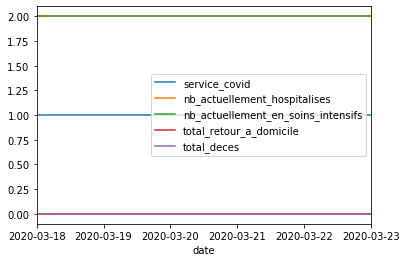

In [14]:
# traçage des différentes catégories
tmp.plot()
plt.show()

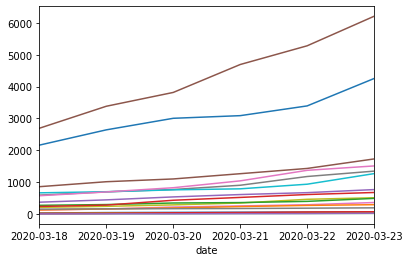

In [15]:
# traçage des cas confirmes par région
for i in df.reset_index()['code_region'].unique():
    df.xs(i, level=1)['cas_confirme'].plot()
plt.show()

__calcul des indicateurs pour un jour donné__ (pour toute la France)

In [24]:
tmp = df.xs(jour).loc[regions]

confirme = tmp['cas_confirme'].sum()
deces = tmp['total_deces'].sum()
domicile = tmp['total_retour_a_domicile'].sum()
intensifs = tmp['nb_actuellement_en_soins_intensifs'].sum()
hospit = tmp['nb_actuellement_hospitalises'].sum()
print(confirme, deces, domicile, intensifs, hospit)

19845 847 2517 2034 8414


__EXPERMINETATIONS__

In [58]:
df = f.load_pickle('df_contamination_fr.p')
df.head()

cas_confirme  service_covid  \
date       code_region                                
2020-03-18 1                      33              0   
           2                      23              1   
           3                      11              0   
           4                      14              1   
           6                       3              0   

                        nb_actuellement_hospitalises  \
date       code_region                                 
2020-03-18 1                                       0   
           2                                      16   
           3                                       0   
           4                                       2   
           6                                       0   

                        nb_actuellement_en_soins_intensifs  \
date       code_region                                       
2020-03-18 1                                             0   
           2                                             5   
           3                                             0   
           4                                             2   
           6                                             0   

                        total_retour_a_domicile  total_deces  
date       code_region                                        
2020-03-18 1                                  0            0  
           2                                  0            1  
           3                                  0            0  
           4                                  0            0  
           6                                  0            0

In [72]:
tmp = df.groupby('date').sum()
tmp.head()

,cas_confirme,service_covid,nb_actuellement_hospitalises,nb_actuellement_en_soins_intensifs,total_retour_a_domicile,total_deces
date,,,,,,
2020-03-18,9127,277,2933,764,811,217
2020-03-19,10988,323,3888,973,1142,315
2020-03-20,12602,372,5046,1267,1541,440
2020-03-21,14451,398,5699,1419,1769,516
2020-03-22,16680,418,6721,1637,2071,619


In [75]:
tmp.index

Index(['2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22',
       '2020-03-23'],
      dtype='object', name='date')

In [78]:
df['cas_confirme'].max()

6211

In [83]:
df.index.levels[0].max()

'2020-03-23'

In [85]:
region_info[11]

{'region': 'Île-de-France', 'lat': 48.5174587303, 'lon': 2.24865517666}

In [100]:
# Carte des régions contaminées de France
region_plotly = f.load_pickle('region_contours_geojson_plotly.p')
tmp = f.load_pickle('df_contamination_fr.p')

jour = tmp.index.levels[0].max()
col = 'cas_confirme'

tmp = tmp.loc[jour][col].reset_index()
tmp['region'] = tmp['code_region'].apply(lambda x: region_info[x]['region'])
tmp['code_region'] = tmp['code_region'].apply(str)
     
max_value = tmp[col].max()
fig =  px.choropleth_mapbox(
    tmp,
    geojson=region_plotly,
    locations='code_region',
    color=col,
    # width=500,
    color_continuous_scale="oranges",
    range_color=(0, max_value),
    mapbox_style="carto-positron",
    zoom=4.5, center = {"lat": 46, "lon": 2.15},
    opacity=0.5,
    #hovertext='region',
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
f.save_pickle(fig, 'fig_fr_contamination_region.p')

In [104]:
jours = df.index.levels[0].tolist()
jour = jours[3]

In [108]:
size = [5 if i== jour else 3 for i in jours]
size

[3, 3, 3, 5, 3, 3]

In [ ]:
size